In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

In [31]:
data_t = np.load('/fastio2/dasha/double_pulse/data_tau_causality_NuTau_1_1_.npy',mmap_mode='r')
data_m = np.load('/fastio2/dasha/double_pulse/data_11vars_NuMu_1_1_1.npy',mmap_mode='r')
data_e = np.load('/fastio2/dasha/double_pulse/data_11vars_NuE_1_1_1.npy',mmap_mode='r')
data_c = np.load('/fastio2/dasha/double_pulse/data_Corsika_10670_to_11865ch_w_dom.npy',mmap_mode='r')

In [32]:
print(data_c.shape)

(79858,)


In [33]:
N1 = 0.99
N2 = 0.8
masks_t = (data_t['preds']['n1'] >= N1) & (data_t['preds']['n4'] >= N2)
masks_m = (data_m['preds']['n1'] >= N1) & (data_m['preds']['n4'] >= N2)
masks_e = (data_e['preds']['n1'] >= N1) & (data_e['preds']['n4'] >= N2)
masks_c = (data_c['preds']['n1'] >= N1) & (data_c['preds']['n4'] >= N2)
print(sum(masks_c))

214


In [34]:
llh = -0.1
maskl_t = data_t['logan_veto']['SPE_rlogl']-data_t['logan_veto']['Cascade_rlogl'] > llh
maskl_m = data_m['logan_veto']['SPE_rlogl']-data_m['logan_veto']['Cascade_rlogl'] > llh
maskl_e = data_e['logan_veto']['SPE_rlogl']-data_e['logan_veto']['Cascade_rlogl'] > llh
maskl_c = data_c['logan_veto']['SPE_rlogl']-data_c['logan_veto']['Cascade_rlogl'] > llh
data_t = data_t[maskl_t]
data_m = data_m[maskl_m]
data_e = data_e[maskl_e]
data_c = data_c[maskl_c]
print(data_c.shape)

(79858,)


In [35]:
N1 = 0.99
N2 = 0.8
masks_t = (data_t['preds']['n1'] >= N1) & (data_t['preds']['n4'] >= N2)
masks_m = (data_m['preds']['n1'] >= N1) & (data_m['preds']['n4'] >= N2)
masks_e = (data_e['preds']['n1'] >= N1) & (data_e['preds']['n4'] >= N2)
masks_c = (data_c['preds']['n1'] >= N1) & (data_c['preds']['n4'] >= N2)
print(sum(masks_c))

214


In [36]:
llh = -0.1
maskl_t = data_t['logan_veto']['SPE_rlogl']-data_t['logan_veto']['Cascade_rlogl'] > llh
maskl_m = data_m['logan_veto']['SPE_rlogl']-data_m['logan_veto']['Cascade_rlogl'] > llh
maskl_e = data_e['logan_veto']['SPE_rlogl']-data_e['logan_veto']['Cascade_rlogl'] > llh
maskl_c = data_c['logan_veto']['SPE_rlogl']-data_c['logan_veto']['Cascade_rlogl'] > llh
data_t = data_t[maskl_t]
data_m = data_m[maskl_m]
data_e = data_e[maskl_e]
data_c = data_c[maskl_c]
print(data_c.shape)

(79858,)


In [52]:
#Zpos = 425
#maskz_c = data_c['logan_veto']['FirstHitZ'] < Zpos
contain = 0 #10
b = 480 #400
m = 1/6 #-1./3.
bottomz = -470 #-200
bottome = 2 #75
maskg_c = (data_c['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_c['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_c['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_c['logan_veto']["LeastDistanceToPolygon_Veto"] +data_c['logan_veto']['VHESelfVetoVertexPosZ']) < b)
#for i in events[maskg_c]:
#    #print(i['image'].shape)

In [53]:
s = set()
for i in data_c[masks_c & maskg_c]['primary']['energy'][:100]:
    s.add(i)

In [54]:
print(s)

{24290.219, 18722.006, 273124.78, 10248.092, 505384.7, 16266.161, 23944.84, 121772.2, 80556.08, 6512.234, 12146.273, 12437.589, 17365.086, 21911.896, 247610.38, 145563.95, 146236.72, 312670.22}


In [55]:
f1 = glob.glob('/home/dup193/work/double_pulse/data/images_3str/Corsika_11057/*')
f2 = glob.glob('/home/dup193/work/double_pulse/data/images_3str/Corsika_11058/*')
f3 = glob.glob('/home/dup193/work/double_pulse/data/images_3str/Corsika_10670/*')
f4 = glob.glob('/home/dup193/work/double_pulse/data/images_3str/Corsika_11362/*')
f5 = glob.glob('/home/dup193/work/double_pulse/data/images_3str/Corsika_11499/*')
f6 = glob.glob('/home/dup193/work/double_pulse/data/images_3str/Corsika_11637/*')
f7 = glob.glob('/home/dup193/work/double_pulse/data/images_3str/Corsika_11808/*')
f8 = glob.glob('/home/dup193/work/double_pulse/data/images_3str/Corsika_11865/*')
files_grabbed = f1+f2+f3+f4+f5+f6+f7+f8
events = []
for file_name in files_grabbed:
    x = np.load(file_name, mmap_mode="r")['arr_0']
    for i in x:
        #if i['primary']['energy'][0] == event['primary']['energy']:
        #    print(file_name)
        if i['primary']['energy'][0] in s:
            events.append(i)

In [41]:
events = []
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/tau_causality/*_data.npz'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    for i in x:
        #if i['primary']['energy'][0] == event['primary']['energy']:
        #    print(file_name)
        if i['primary']['energy'][0] in s:
            events.append(i)

In [59]:
events = np.array(events)
print(events.shape)

(4, 1)


In [57]:
def check(event):
    name= "E{0}Q{1}".format(event['primary']['energy'],event['qtot'])
    data = np.load(file_name, mmap_mode="r")['arr_0']
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(131)
    #print(event['image'].shape)
    ax1.imshow(event['image'][0,:,:,0], aspect='auto', cmap= 'gray')
    ax2 = fig.add_subplot(132)
    ax2.imshow(event['image'][0,:,:,1], aspect='auto', cmap= 'gray')
    ax3 = fig.add_subplot(133)
    ax3.imshow(event['image'][0,:,:,2], aspect='auto', cmap= 'gray')
    plt.savefig("../Corsika_Images_GCut/"+name+".png")

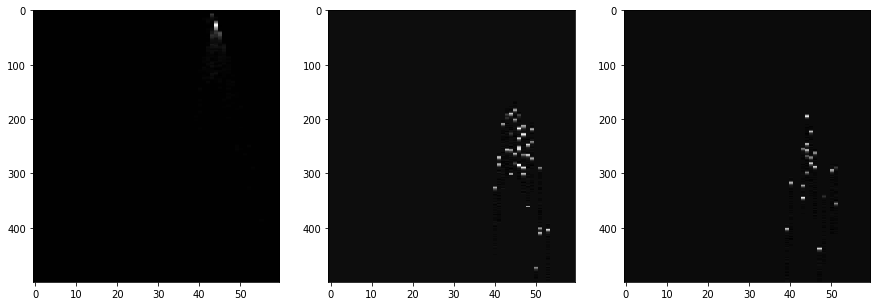

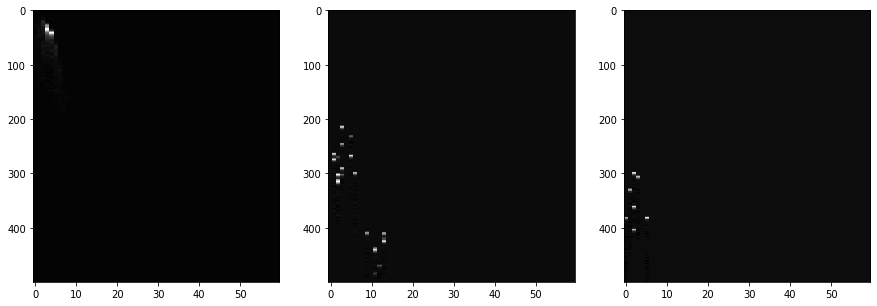

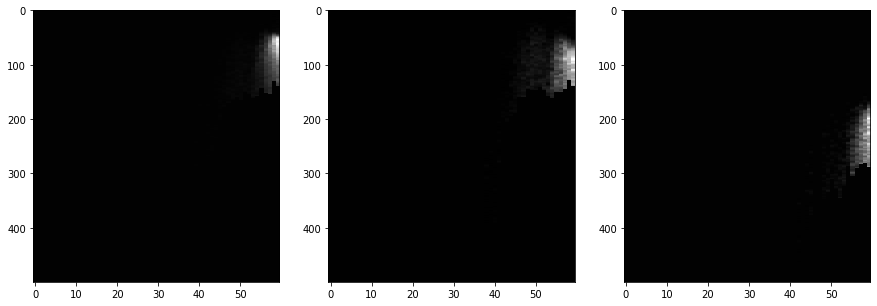

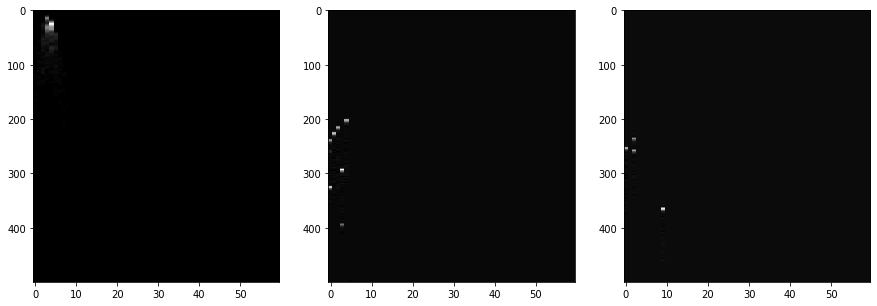

In [58]:
for i in events[:100]: check(i)

In [45]:
Zpos = 425
maskz_c = events['logan_veto']['FirstHitZ'] < Zpos
contain = 0 #10
b = 400
m = -1./3.
bottomz = -200
bottome = 75
maskg_c = (events['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((events['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (events['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * events['logan_veto']["LeastDistanceToPolygon_Veto"] +events['logan_veto']['VHESelfVetoVertexPosZ']) < b)
#for i in events[maskg_c]:
#    #print(i['image'].shape)

TEST
[(0, 4294967295, 1651, 0)]  QTOT=  [1043.625]
0.0 0.0 0.0
PRIMARY
[([1637250593,     939283], 13, 12146.273, [  233.70332, -3033.5022 ,  1949.3539 ], [0.8896165, 4.6929517], -1762.8712, 3878.6235)]
[([3973641379,         70], -2000001001, 5340.6455, [ 286.3938 , -323.0734 , -248.17459], [0.8896165, 4.6929517], 9877.679, 0.)]
COG=  [[ 268.0567  -298.4507  -250.02457]]
MOI=  [31959294.]  LLHCUT=  [0.05494628]  W=  [0.06370654]
ST_INFO
[[(814.275, 12,     0.   ) ( 43.05 , 20, 15607.295)
  ( 31.125, 13, 15664.13 )]]
ST_INFO_all
[[(814.275    , 12,      0.   ) ( 43.05     , 20,  15607.295)
  ( 31.125    , 13,  15664.13 ) ( 26.95     , 19,  18591.361)
  ( 23.975    ,  6,  15639.061) ( 13.375    , 11,  15567.956)
  (  9.675    ,  5,  15585.587) (  6.85     , 28,  46898.414)
  (  5.0750003, 80, 111173.766) (  5.025    , 32, 577986.2  )]]
TI
[[1.43392705e+04 2.34115839e-01 2.21743906e+04 2.47349512e+04]]
MAP
[((0, 4294967295, 1651, 0), 147, [19, 15, 12], 147, [19, 15, 12], 147, [19, 15, 12

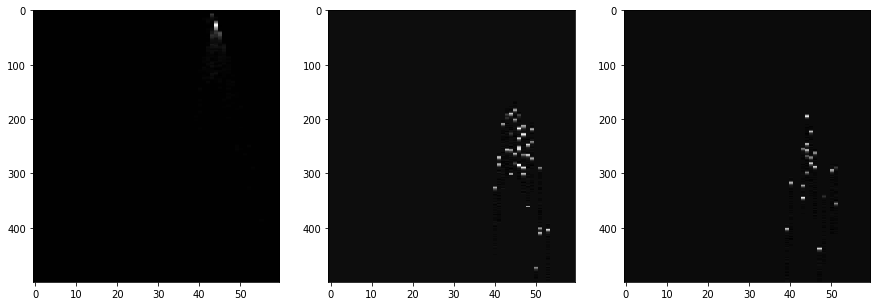

In [82]:
event  = events[maskg_c]
check(event)

print("TEST")
print(event['id']," QTOT= ", event['qtot'])
print(np.sum(event['image'][:,:,0]),np.sum(event['image'][:,:,1]),np.sum(event['image'][:,:,2]))
print('PRIMARY')
print(event['primary'])
print(event['prim_daughter'])
print("COG= ",event['cog'])
print("MOI= ",event['moi']," LLHCUT= ",event['llhcut'], " W= ",event['weight_val'])
print("ST_INFO")
print(event['qst'])
print("ST_INFO_all")
print(event['qst_all'])
print("TI")
print(event['ti'])
print("MAP")
print(event['map'])
print("LOGAN")
print(event['logan_veto'])
print("HESE")
print(event['hese_old'])
print(event['hese'])
print("WEIGHT")
print(event['weight_val'])
print(event['id'], event['primary']['energy'])

In [ ]:
def Scatter2d_2(data_t1,data_t2,data_e1,data_e2,l1=[0,1],l2=[0,1], label1 ="label",label2="label"):
    fig, ax = plt.subplots(nrows=1, ncols=2,sharex = True,sharey=True, figsize=(20,10),facecolor ='w')
  
    plt.subplot(1,2,1)
    ax1 = plt.gca()
    ax1.set_xlim(l1)
    ax1.set_ylim(l2)
    ax1.set_title('Pass')
    plt.scatter(data_t1,data_t2, c = 'g', s =0.9)
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax1.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(1,2,2)
    ax2 = plt.gca()
    ax2.set_xlim(l1)
    ax2.set_ylim(l2)
    ax2.set_title('NoPass')
    plt.scatter(data_e1,data_e2, c = 'b', s =0.9)
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax2.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='minor', labelsize=8)